In [3]:
import pandas as pd
import json

with open('data/BTC_USDT_-1h-futures.json', 'r') as f:
    json_data = json.load(f)

columns = ['time', 'open', 'high', 'low', 'close', 'volume']

df = pd.DataFrame(json_data, columns=columns)

In [8]:
df

,time,open,high,low,close,volume,highest,lowest
0,1598140800000,11670.48,11695.90,11625.84,11649.99,4616.602,11657.70,11565.00
1,1598144400000,11650.00,11654.99,11621.39,11648.83,2531.755,11657.70,11565.00
2,1598148000000,11648.83,11657.70,11611.00,11614.34,2594.861,11633.30,11565.00
3,1598151600000,11614.33,11633.30,11592.29,11605.59,3071.672,11626.82,11565.00
4,1598155200000,11605.59,11619.90,11591.00,11607.98,2342.602,11626.82,11551.33
...,...,...,...,...,...,...,...,...
18889,1666141200000,19226.20,19319.00,19210.00,19305.30,10733.439,NaN,NaN
18890,1666144800000,19305.30,19310.50,19242.20,19285.60,8634.389,NaN,NaN
18891,1666148400000,19285.50,19300.00,19250.00,19276.00,6697.010,NaN,NaN
18892,1666152000000,19276.00,19300.00,19250.00,19269.10,7007.676,NaN,NaN


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the lookback and front windows
lookback_window = 25
front_window = 25

# Initialize lists to store the highest and lowest spots
highest_spots = df['high'].shift(-lookback_window, fill_value=0).rolling(front_window).max()
lowest_spots = df['low'].shift(-lookback_window, fill_value=0).rolling(front_window).min()

# Plot vertical lines at the start and end times of each price movement
# for movement in movements:
#     plt.axvline(movement['start_time'], color='green', linestyle='--', label='Movement')
#     plt.axvline(movement['end_time'], color='red', linestyle='--', label='Movement')

# # Add labels and legend to the graph
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.title('Price Graph with Highest and Lowest Spots')
# # plt.legend()

# # Display the graph
# plt.show()

In [54]:
def pivots_high(df, length):
    return df[df['high'].rolling(length * 2 + 1).max().shift(-length - 1) == df['high']]

def pivots_low(df, length):
    return df[df['low'].rolling(length * 2 + 1).min().shift(-length - 1) == df['low']]

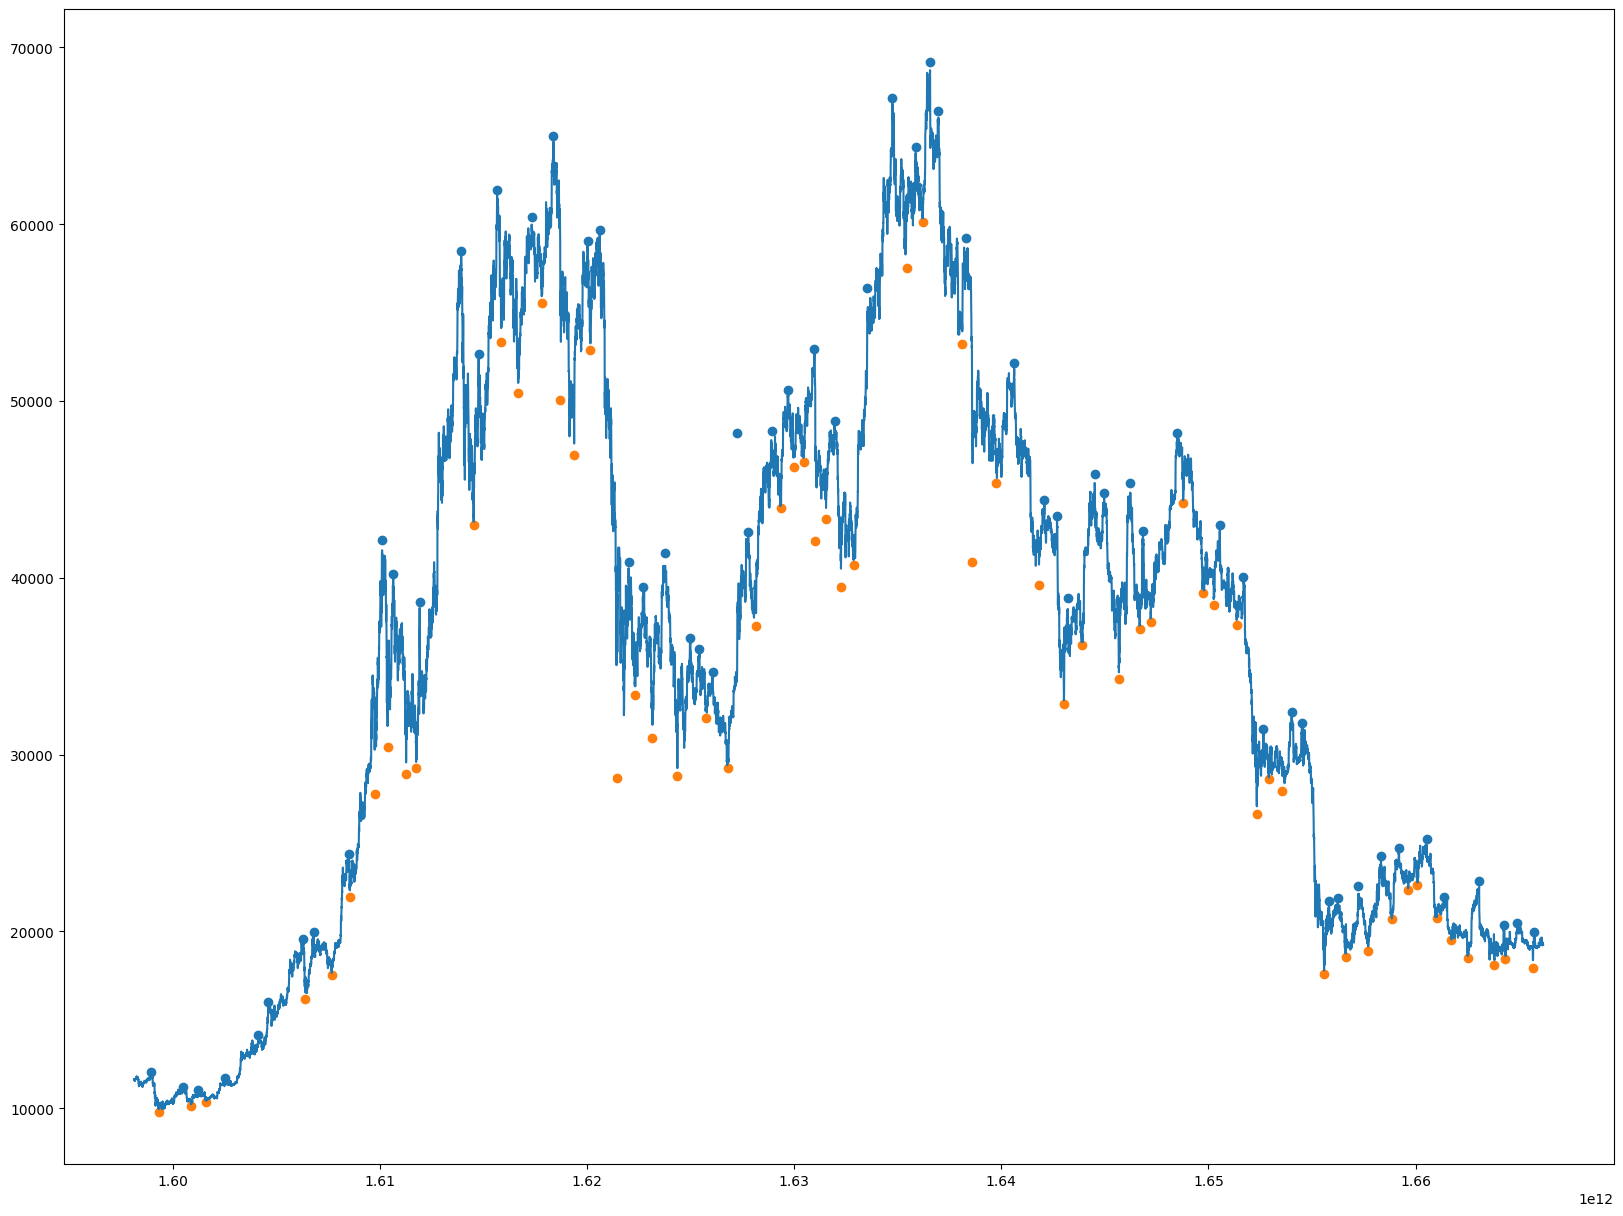

In [69]:
fig = plt.figure()


# Set the size of the figure to match the screen
fig.set_size_inches(20, 15)

plt.scatter(pivots_high(df,100)['time'], pivots_high(df,100)['high'])
plt.scatter(pivots_low(df,100)['time'], pivots_low(df,100)['low'])
plt.plot(df['time'], df['close'])

In [68]:
pivots_low(df,100)['time']

330      1599328800000
764      1600891200000
970      1601632800000
2297     1606410000000
2650     1607680800000
             ...      
17663    1661727600000
17882    1662516000000
18238    1663797600000
18386    1664330400000
18756    1665662400000
Name: time, Length: 61, dtype: int64

In [53]:
pivots_high(df)['high']

35       11831.96
88       11548.68
109      11593.00
136      11544.88
151      11582.00
           ...   
18742    19240.00
18769    19947.90
18836    19415.90
18853    19666.00
18870    19706.40
Name: high, Length: 638, dtype: float64